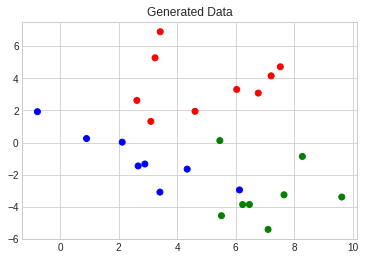

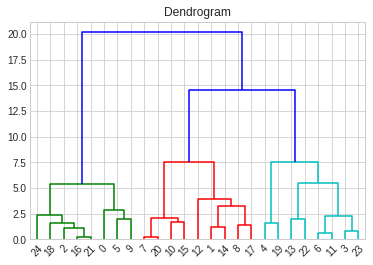

In [ ]:
# 병합형 계층적 군집화
from sklearn.datasets import make_blobs # 덩어리 데이터 만들기
# scipy는 과학기술계산 패키지
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage #linkage 함수
from scipy.cluster.hierarchy import dendrogram # dendrogram 함수
import numpy as np
from matplotlib import pyplot as plt

X,Y = make_blobs(n_samples=25, n_features=2, centers=3, cluster_std=1.5) # 데이터 25개, 2차원, 군집의 표준편차는 1.5
colormap = np.array(['r','g','b'])#빨,녹,파 색깔로 나타낸다
plt.scatter(X[:,0], X[:,1], c=colormap[Y])# 점으로 그리기
plt.title('Generated Data')# 그래프의 이름
plt.show()#그래프 출력

Xdist = pdist(X, metric='euclidean') #거리행렬 계산
Z=linkage(Xdist, method='ward') # ward 연결을 사용해 계층적 군집화를 한다
Zd=dendrogram(Z) # 덴드로그램으로 보여주기
plt.title('Dendrogram') # 그래프이름
plt.show()# 그래프 출력

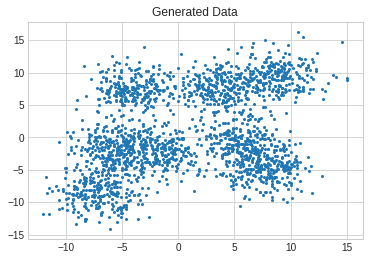

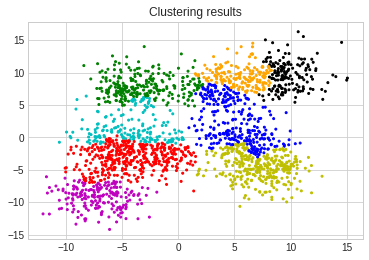

In [ ]:
# 병합형 계층적 군집화(sklearn)
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering # sklearn으로 병합형 계층적 군집화를 할 때
import numpy as np
from matplotlib import pyplot as plt

X,Y = make_blobs(n_samples=2000, n_features=2, centers=8, cluster_std=2.0) # 데이터 2000개, 2차원, 군집8개, 군집의 표준편차 2
plt.scatter(X[:,0], X[:,1], s=4) # 생성된 데이터를 점으로 그래프에 표시한다.
plt.title('Generated Data') # 그래프 이름
plt.show() # 그래프 보여주기

Z = AgglomerativeClustering(n_clusters=8, linkage='complete') # 군집 8개를 compelte linkage이용해 군집화 한다.
P = Z.fit_predict(X) # 입력값에 대한 군집화 결과를 보여준다
colormap=np.array(['r','g','b','k','y','c','m','orange']) # 군집을 색깔별로 나타낸다.
plt.scatter(X[:,0], X[:,1], s=4, c=colormap[P]) # 형성된 군집을 점으로 표시
plt.title('Clustering results') #그래프 이름
plt.show()# 그래프 보여주기

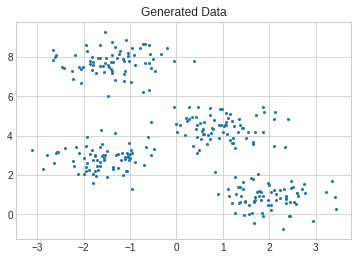

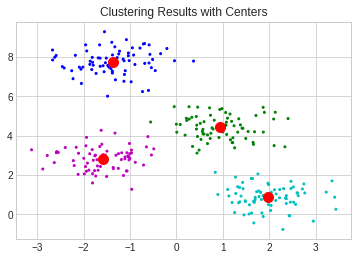

In [ ]:
# k-means 군집화
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans # 클러스터에 k-means

X,y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0) # 데이터 300개, 군집 4개, 표준편차 0.6
plt.scatter(X[:,0], X[:,1], s=4) # 생성된 데이터를 점으로 표시
plt.title('Generated Data')# 그래프 이름
plt.show()# 그래프 출력

kmeans=KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=0) # k=클러스터 4개, 초기값 선택할 때-> 임의의 점 선택 후 거리가 먼 것이 걸릴 확률을 크게하여 선택
pred_y=kmeans.fit_predict(X) # 군집 만들기
colormap=np.array(['c','g','b','m']) # 각 군집에 대해 색상 지정
plt.scatter(X[:,0],X[:,1], s=4, c=colormap[pred_y]) # 생성된 군집 점으로 표시
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red') # 각 군집의 중심을 빨간점으로 표시한다.
plt.title('Clustering Results with Centers') # 그래프 이름
plt.show()# 그래프 출력

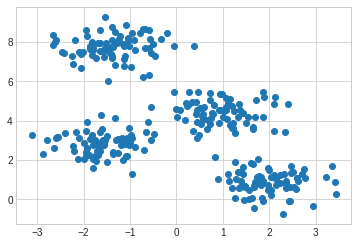

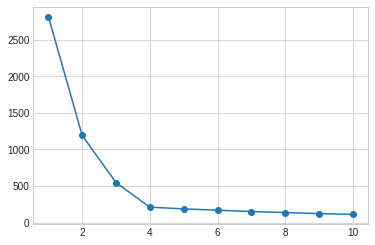

In [ ]:
# elbow 방법에 의한 군집 개수 추정
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0) # 데이터 300개, 군집 4개, 표준편차 0.6
plt.scatter(X[:,0], X[:,1]) # 생성된 데이터 점으로 표시
plt.show() # 그래프 출력

SSEs=[] # 배열 만들기
for i in range(1, 11): # 10번 반복 1~10
  kmeans=KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0) # 군집의 개수를 로 둔다.-> 군집을 늘려가면서 군집 내 변동성이 급감하는 군집 개수를 찾음
  kmeans.fit_predict(X) # 입력값으로 학습
  SSEs.append(kmeans.inertia_) #SSE값 저장 ineria에 저장되어 있음

plt.plot(range(1,11),SSEs, marker='o') # 범위는 0~10, SSEs의 값 x축,y축으로 사용
plt.show()# 그래프 출력

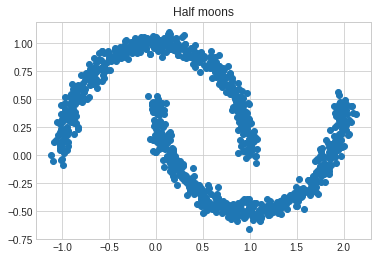

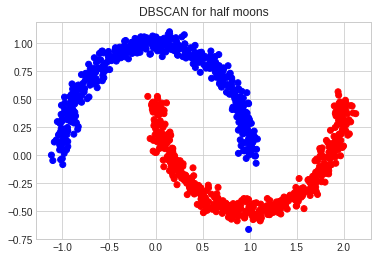

In [ ]:
# DBSCAN 군집화
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN # 클러스터에 DBSCAN
import numpy as np
from matplotlib import pyplot as plt

X,Y=make_moons(n_samples=1000, noise=0.05) # 반달모양 데이터 생성,데이터 1000개, 잡음 0.05

plt.title('Half moons')# 그래프 이름
plt.scatter(X[:,0],X[:,1]) # 생성된 데이터 점으로 표시. 
plt.show() #그래프 출력

dbs=DBSCAN(eps=0.1) # 반경 0.1
Z=dbs.fit_predict(X) # 입력값으로 학습

colormap = np.array(['r','b']) # 학습된 데이터 색 지정
plt.scatter(X[:,0],X[:,1], c=colormap[Z]) # 점으로 표시
plt.title('DBSCAN for half moons') # 그래프 이름
plt.show() #그래프 출력

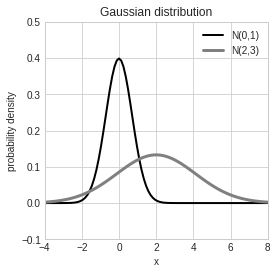

In [ ]:
# 1차원 가우시안 분포
import numpy as np
import matplotlib.pyplot as plt

def gauss(mu,sigma): # 가우시안 분포 함수값 계산 (평균, 시그마)
  return np.exp(-(x-mu)**2/sigma**2)/(np.sqrt(2*np.pi)*sigma) # 계산식

x=np.linspace(-4, 8, 100) #linear space
plt.figure(figsize=(4,4)) # 그림 그리기 사이즈(4,4)
plt.plot(x,gauss(0,1), 'black', linewidth=2, label='N(0,1)')#평균0 분산1. 가우스분포 계산 후 그리기
plt.plot(x,gauss(2,3), 'gray', linewidth=3, label='N(2,3)')#평균2 분산3. 가우스분포 계산 후 그리기
plt.legend() # 하나의 그래프 안에 위치
plt.ylim(-0.1,0.5) # y축 범위
plt.xlim(-4,8)# x축 범위
plt.xlabel('x') # x축 이름
plt.ylabel('probability density') # y축 이름
plt.title('Gaussian distribution') #그래프 이름
plt.grid(True) # 격자모양으로 표시
plt.show()# 그래프 출력

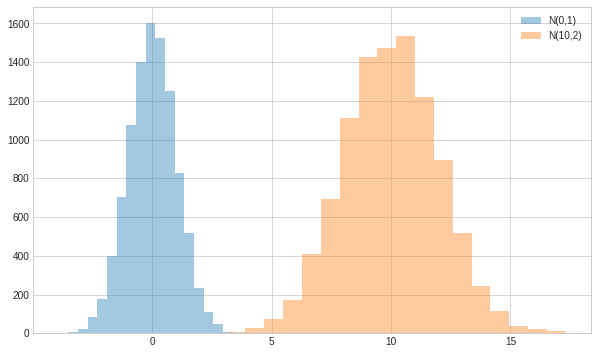

In [ ]:
# 가우시안 분포 데이터 생성
import numpy as np 
import matplotlib.pyplot as plt 

m = 10 # 평균
sigma = 2 # 표준편차
x1 = np.random.randn(10000) #1차원 가우시안 분포 데이터 생성. 만개 N(0,1)
x2 = m + sigma*np.random.randn(10000) # m만큼 더한 값. 평균이 10

plt.figure(figsize=(10,6)) #10,6 사이즈로 그림 그리기
plt.hist(x1, bins=20, alpha=0.4, label='N(0,1)') # 20개로 구간을 나눠서 표시
plt.hist(x2, bins=20, alpha=0.4, label='N(10,2)') # 평균은10 분산은 2로 해서 더 넓은 그래프 생성
plt.legend() # 하나의 그래프 안에 위치
plt.show()# 그래프 출력

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'сmap'


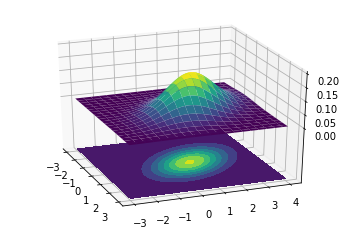

In [1]:
# 2차원 가우시안 분포 그리기
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D

def multivariate_gaussian(pos, mu, Sigma): # 다차원 가우시안 함수
  n = mu.shape[0] # 2파이의 n승
  Sigma_det = np.linalg.det(Sigma) # 행렬식
  Sigma_inv = np.linalg.inv(Sigma) #역행렬
  N = np.sqrt((2*np.pi)**n * Sigma_det) # 분모값
  fac = np.einsum('...k, kl,...l->...', pos-mu, Sigma_inv, pos-mu) # 합연산
  return np.exp(-fac / 2)/N # 총 계산식

N = 60 
X = np.linspace(-3, 3, N) # 선형 간격의 벡터 생성
Y = np.linspace(-3, 4, N) # 선형 간격의 벡터 생성
X, Y = np.meshgrid(X, Y) # 메시그리드 생성
mu = np.array([0., 1.]) # 평균 벡터
Sigma = np.array([[ 1., -0.5], [-0.5, 1.5]]) # 공분산 행렬 
pos = np.empty(X.shape + (2,)) # 주어진 형태와 타입을 갖는 새로운 어레이 반환
pos[:, :, 0] = X # X입력
pos[:, :, 1] = Y # Y입력
Z = multivariate_gaussian(pos, mu, Sigma) # 가우시안 식 적용 
fig = plt.figure() # 그림 그리기
ax = fig.gca(projection='3d') # 이전 그림이 없으면 생성. 3차원으로
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis) # 3차원 지도
cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.2, сmap=cm.viridis) # 같은 확률에 대한 부분을 등고선으로 표시
ax.set_zlim(-0.2,0.2) # z축 범위 제한
ax.set_zticks(np.linspace(0,0.2,5)) # 축과 격자선 숨김. 아래부분
ax.view_init(27, -21)  # 방향돌리기
plt.show() # 그래프 출력

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


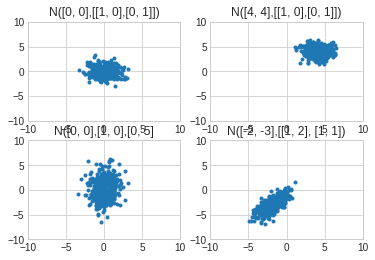

In [ ]:
# 2차원 가우시안 분포 샘플 생성
import numpy as np 
import matplotlib.pyplot as plt

def gaussPlot(r, c, idx, mean, cov, title):
  x, y = np.random.multivariate_normal(mean, cov, 400).T # 다변수 정규분포 (평균, 공분산, 데이터 개수)
  ax = plt.subplot(r, c, idx) # 서브플롯 생성
  ax.set_xlim(-10, 10) # x축 범위 제한
  ax.set_ylim(-10, 10) # y축 범위 제한
  ax.set_title(title) # 그래프이름
  plt.plot(x, y, '.')# 출력

mean = [0, 0] # 평균
cov = [[1, 0], [0, 1]] # 공분산 행렬
gaussPlot(2,2,1, mean, cov,'N([0, 0],[[1, 0],[0, 1]])') # 공모양

mean = [4, 4] # 평균
cov = [[1, 0], [0, 1]]  # 공분산 행렬
gaussPlot(2,2,2, mean, cov,'N([4, 4],[[1, 0],[0, 1]])') # 공모양

mean = [0, 0] # 평균
cov = [[1, 0], [0, 5]]  # 공분산 행렬
gaussPlot(2,2,3, mean, cov,'N([0, 0],[1, 0],[0, 5]') # 타원 모양

mean = [-2, -3] # 평균
cov = [[1, 2], [1, 1]]  # 공분산 행렬
gaussPlot(2,2,4, mean, cov,'N([-2, -3],[[1, 2], [1, 1])')# 기울어진 타원 모양

plt.show() # 그래프 출력

[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0
 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


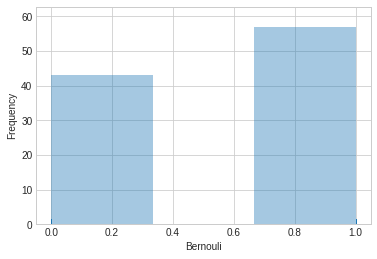

In [ ]:
# 베르누이 분포 샘플 생성
from scipy.stats import bernoulli # 베르누이 패키지
import matplotlib.pyplot as plt 
import seaborn as sns

data_bern = bernoulli.rvs(size=100,p=0.6) # 100개의 데이터 생성. 1이될 확률이 0.6
print(data_bern) # 데이터 출력

ax = sns.distplot(data_bern,kde=False, rug=True) # 히스토그램과 kdeplot을 같이 그려주는 것
ax.set(xlabel='Bernouli', ylabel='Frequency') # x축은 베르누이, y축은 빈도수
plt.show()# 그래프 출력

[1, 1, 4, 2, 3, 3, 2, 3, 2, 2]


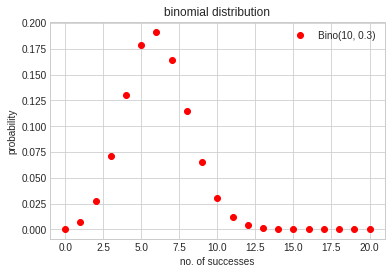

In [ ]:
# 이항 분포 샘플 생성 및 확률 계산
import numpy as np 
from scipy.stats import binom 
import matplotlib.pyplot as plt

def run_binom(trials, n, p): # 이항분포 데이터 생성.(시도횟수, 던지는 수, 확률)
  heads = [] 
  for i in range(trials):# 시도횟수만큼 반복
    tosses = [np.random.random() for i in range(n)]# n범위 만큼 반복하여 랜덤 생성
    heads.append(len([i for i in tosses if i <= p])) # 길이를 누적 저장
  return heads

successes = run_binom(10, 5, 0.4) # 이항분포 함수 호출
print(successes) #출력

trials = 1000 #시도횟수
n = 20 # 시행 수
p = 0.3 # 확률
x = range(0,21) # 성공수
plt.plot(x, binom.pmf(x, n, p), 'ro', label='Bino(10, 0.3)') # 확률 질량 함수. p확률로 n번 했을 때 x번 성공할 확률
plt.title('binomial distribution') # 그래프 이름
plt.xlabel('no. of successes') # x축 이름
plt.ylabel('probability')  # y축 이름
plt.legend() # 하나의 그래프 안에 위치
plt.show()# 그래프 출력

In [ ]:
# 다항 분포 확률 계산
from scipy.stats import multinomial # 다항

p = [1.0/5.0, 3.0/5.0, 1.0/5.0] # 확룰 분포 3개의 사건
k = 100 # 전체 샘플의 개수. 실험 100번

dist = multinomial(k, p) # 다항분포
cases = [20, 50, 30] # 각 사건 개수. 총 100개
pr = dist.pmf(cases) # 확률 계산

print('Case=%s, Probability: %.3f%%' % (cases, pr*100)) # 출력

Case=[20, 50, 30], Probability: 0.043%


   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2  setosa
1                4.9               3.0  ...               0.2  setosa
2                4.7               3.2  ...               0.2  setosa
3                4.6               3.1  ...               0.2  setosa
4                5.0               3.6  ...               0.2  setosa

[5 rows x 5 columns]


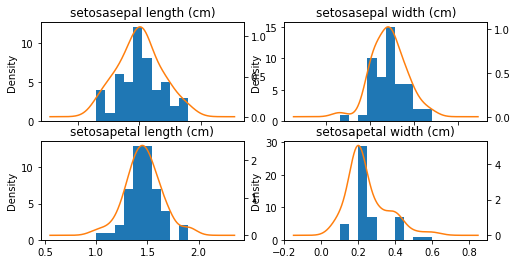

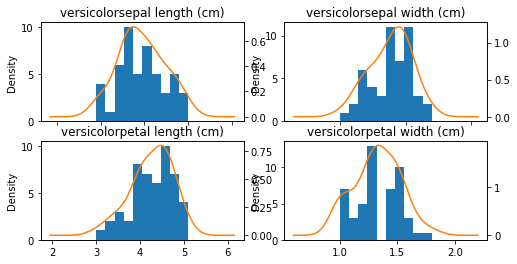

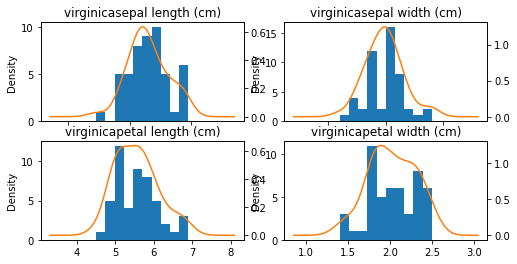

performance =                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.80      0.84        10
           2       0.78      0.88      0.82         8

    accuracy                           0.90        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30

accuracy =  0.9


In [ ]:
# 단순 베이즈 분류기 -붓꽃 분류 (가우시안)
import pandas as pd 
from sklearn.datasets import load_iris # 붓꽃 데이터
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # 가우시안
from sklearn import metrics 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt

dataset = load_iris() # 붓꽃 데이터 불러오기
df = pd.DataFrame(dataset.data, columns=dataset.feature_names) # 데이터 프레임 생성
df['target'] = dataset.target # 타겟 저장
df.target = df.target.map({0:'setosa', 1:'versicolor', 2:'virginica'}) # 맵핑. 0,1,2를 각각  setosa,versicolor,virginica 로
print(df.head()) # 5개 출력

def showDist(r,c,idx,category,attr): # 그래프 보여주기
  data_df=df[df.target==category] # 배열
  plt.subplot(r,c,idx) # 서브플롯 생성
  ax=data_df[attr].plot(kind='hist') # 히스토그램
  data_df[attr].plot(kind='kde', ax=ax, secondary_y=True, title=category+''+attr, figsize=(8,4)) # 커널 밀도 히스토그램

showDist(2,2,1, 'setosa', 'sepal length (cm)') # 1번째에는 setosa의 꽃받침 길이
showDist(2,2,2, 'setosa', 'sepal width (cm)') # 2번째에는 setosa의 꽃받침 너비
showDist(2,2,3, 'setosa', 'petal length (cm)') # 3번째에는 setosa의 꽃잎 길이
showDist(2,2,4, 'setosa', 'petal width (cm)') # 4번째에는 setosa의 꽃잎 너비
plt.show()

showDist(2,2,1, 'versicolor', 'sepal length (cm)')  # 1번째에는 versicolor의 꽃받침 길이
showDist(2,2,2, 'versicolor', 'sepal width (cm)') # 2번째에는 versicolor의 꽃받침 너비
showDist(2,2,3, 'versicolor', 'petal length (cm)') # 3번째에는 versicolor의 꽃잎 길이
showDist(2,2,4, 'versicolor', 'petal width (cm)')  # 4번째에는 versicolor의 꽃잎 너비
plt.show()

showDist(2,2,1, 'virginica', 'sepal length (cm)')  # 1번째에는 virginica의 꽃받침 길이
showDist(2,2,2, 'virginica', 'sepal width (cm)') # 2번째에는 virginica의 꽃받침 너비
showDist(2,2,3, 'virginica', 'petal length (cm)') # 3번째에는 virginica의 꽃잎 길이
showDist(2,2,4, 'virginica', 'petal width (cm)') # 4번째에는 virginica의 꽃잎 너비
plt.show()

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2) # 데이터 나누기 0.2는 학습데이터로 사용
model = GaussianNB() # 가우시안 함수 사용
model.fit(X_train, y_train) # 모델 학습

predicted_y = model.predict(X_test) # 입력값에 대해 모델 예측
performance = metrics.classification_report(y_test, predicted_y) # 정확도 판정. 참값과 예측값
print('performance = ',performance) # 성능 출력
accuracy = accuracy_score(y_test, predicted_y) # 정확도 계산
print('accuracy = ', accuracy) # 정확도 출력


In [ ]:
# 단순 베이즈 분류기 -wine 데이터 분류
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics

wine = datasets.load_wine() # 와인 데이터 가져오기.
print("Features: ", wine.feature_names) # 속성 출력
print(wine.data[0:5,:]) # 데이터 5개 출력
print("Labels: ", wine.target_names) # 타겟 이름 출력
print(wine.target[0:3]) # 타겟 레이블 출력
print("No. of data:", len(wine.data)) # 전체 개수 출력

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=0) # 30% 데이터를 테스트 데이터로 사용
gnb = GaussianNB() # 부류별 속성겂의 가능도 분포를 가우시안 분포로 계산
gnb.fit(X_train, y_train) # 모델 학습
y_pred = gnb.predict(X_test) # 입력값에 대해 예측
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) # 정확도 출력

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
Labels:  ['class_0' 'class_1' 'class_2']
[0 0 0]
No. of data: 178
Accuracy: 0.9444444444444444


In [ ]:
# 단순 베이즈 분류기 -이메일 스팸 판정(베르누이)
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import BernoulliNB # 베르누이
from sklearn.metrics import accuracy_score

email_list = [ # 제목과 스팸 여부 데이터 리스트
              {'title':'free game only today', 'spam': True}, # 스팸 ㅇ
              {'title':'cheapest flight deal', 'spam': True}, # 스팸 ㅇ
              {'title':'limited time offer only today only today', 'spam': True}, # 스팸 ㅇ
              {'title':'your flight schedule attached', 'spam':False}, # 스팸 x
              {'title':'today meeting schedule', 'spam':False},# 스팸 x
              {'title':'your credit card statement', 'spam':False} ] # 스팸 x
df = pd.DataFrame(email_list) # 데이터 프레임 생성

df['label'] = df['spam'].map({True:1, False:0}) # 스팸이면 1 아니면 0
df_x = df['title'] # x축은 타이틀
df_y = df['label'] # y축은 레이블
print("** 데이터 **\n", df) #df 출력

cv = CountVectorizer(binary=True) # 고정길이 이진벡터의 단어의 출현여부 표현
x_traincv = cv.fit_transform(df_x) # 데이터 변환
print('\n변환된 데이터 표현 (1~2번째 이메일) **\n', x_traincv[0:2])# 변환된 데이터 출력
      
encoded_input = x_traincv.toarray() # 배열로 변환
print('\n** 이진 벡터 표현 **\n', encoded_input)# 이진벡터 출력

print('\n** 벡터 위치별 대응 단어 **\n', cv.get_feature_names()) # 벡터 위치별 대응 단어
print('\n** 첫번째 벡터에 대응하는 단어들 **\n', cv.inverse_transform(encoded_input[0])) # 벡터 위치별 대응 단어 출력. 이진배열표현->문자열 표현

Bnb = BernoulliNB() # 베르누이
y_train = df_y.astype('int') # int형으로 변환
Bnb.fit(x_traincy, y_train)# 학습

test_email_list = [ # 테스트 데이터
                   {'title':'free flight offer', 'spam':True}, # 스팸 ㅇ
                   {'title':'hey traveler free flight deal', 'spam':True}, # 스팸 ㅇ
                    {'title':'limited free game offer', 'spam':True}, # 스팸 ㅇ
                    {'title':'today flight schedule', 'spam':False}, # 스팸 x
                     {'title':'your credit card attached', 'spam':False}, # 스팸 x
                     {'title':'free credit card offer only today', 'spam':False} ]# 스팸 x


test_df = pd.DataFrame(test_email_list) # 데이터 프레임 생성
test_df['label'] = test_df['spam'].map({True:1, False:0}) # 스팸은 1로 아니면 0으로 매핑
test_x = test_df['title'] #타이틀을 테스트 입력으로
test_y = test_df['label']# 레이블을 테스트 출력으로
x_testcv = cv.transform(test_x) # 데이터 변환

predicted_y = Bnb.predict(x_testcv) # 예측
print('\n** Predicted Label **\n', predicted_y) # 예측 출력 
accuracy = accuracy_score(test_y, predicted_y) # 정확도
print('\nAccuracy = ', accuracy) # 정확도 출력


** 데이터 **
                                       title   spam  label
0                      free game only today   True      1
1                      cheapest flight deal   True      1
2  limited time offer only today only today   True      1
3             your flight schedule attached  False      0
4                    today meeting schedule  False      0
5                your credit card statement  False      0

변환된 데이터 표현 (1~2번째 이메일) **
   (0, 6)	1
  (0, 7)	1
  (0, 11)	1
  (0, 15)	1
  (1, 2)	1
  (1, 5)	1
  (1, 4)	1

** 이진 벡터 표현 **
 [[0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0]
 [0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1]]

** 벡터 위치별 대응 단어 **
 ['attached', 'card', 'cheapest', 'credit', 'deal', 'flight', 'free', 'game', 'limited', 'meeting', 'offer', 'only', 'schedule', 'statement', 'time', 'today', 'your']

** 첫번째 벡터에 대응하는 단어들 **
 [array(['free', 'game', 

In [2]:
# 단순 베이즈 분류기 -영화 추천(다항분포)
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB #다항분포
from sklearn.metrics import accuracy_score

review_list = [ #리뷰
               {'review':'This is a great movie. I will watch again', 'type':'positive'}, # 긍정적
               {'review':'I like this movie', 'type':'positive'}, # 긍정적
               {'review':'amazing movie this year', 'type':'positive'}, # 긍정적
               {'review':'cool my boyfriend also said the movie is chool', 'type':'positive'}, # 긍정적
               {'review':'awesome of the awesome movie ever', 'type':'positive'}, # 긍정적
               {'review':'shame I waste money and time', 'type':'negative'}, #부정적
               {'review':'regret on this movie. I will never never what movie from this director', 'type':'negative'},#부정적
               {'review':'I do not like this movie', 'type':'negative'}, #부정적
               {'review':'I do not like actors in this movie', 'type':'negative'},#부정적
               {'review':'boring boring sleeping movie', 'type':'negative'} ] #부정적
df = pd.DataFrame(review_list) # 데이터 프레임 생성
df['label'] = df['type'].map({'positive':1, 'negative':0}) # 긍정적 리뷰를1 부정적 리뷰를 0
df_x = df['review'] # x축을 리뷰
df_y = df['label'] #yc축을 레이블

cv = CountVectorizer() # 고정길이 이진벡터의 단어의 출현여부 표현
x_traincv = cv.fit_transform(df_x) # 데이터 변환
encoded_input = x_traincv.toarray() # 벡터로 표현
print('\n벡터 표현\n', encoded_input) # 출력
print('\n벡터의 원소 위치별 단어\n', cv.get_feature_names()) #출력. 단어들이 어떤 순서로 저장되었는지.

test_review_list = [# 테스트 데이터
                    {'review':'great great great movie ever', 'type':'positive'}, #긍정적
                    {'review':'I like this amazing movie', 'type':'positive'}, #긍정적
                     {'review':'my boyfriend said great movie ever', 'type':'positive'}, #긍정적
                     {'review':'cool cool cool', 'type':'positive'}, #긍정적
                     {'review':'awesome boyfriend said cool movie ever', 'type':'positive'}, #긍정적
                     {'review':'shame shame shame', 'type':'negative'}, #부정적
                     {'review':'awesome director shame movie boring movie', 'type':'negative'},#부정적
                     {'review':'do not like this movie', 'type':'negative'}, #부정적
                      {'review':'I do not like this boring movie', 'type':'negative'}, #부정적
                      {'review':'aweful terrible boring movie', 'type':'negative'} ]#부정적

test_df = pd.DataFrame(test_review_list)# 데이터 프레임 생성
test_df['label'] = test_df['type'].map({'positive':1, 'negative':0})  # 긍정적 리뷰를1 부정적 리뷰를 0
test_x = test_df['review'] #리뷰를 테스트 입력으로
test_y = test_df['label']#레이블을 테스트 출력으로

x_testcv = cv.transform(test_x) #데이터 변환

Mnb = MultinomialNB() # 다항분포
y_train = df_y.astype('int') # int형으로 변환
Mnb.fit(x_traincv, y_train) # 모델 학습
predicted_y = Mnb.predict(x_testcv) # 입력값에 대해 예측
print("\n** ground truth **\n", test_y) # 참값 출력
print("\n** 예측치 **\n", predicted_y) # 예측값 출력
accuracy = accuracy_score(test_y, predicted_y)# 정확도 계산
print('\n** 정확도 **\n', accuracy)# 정확도 출력




벡터 표현
 [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
  0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  1]
 [0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
  0]
 [0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
  0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
  0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 2 0 2 0 0 1 1 0 0 0 0 2 0 0 0 1 1
  0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
  0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
  0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0]]

벡터의 원소 위치별 단어
 ['actors', 'again', 'also', 'amazing', 'and', 'awesome', 'boring', 'boyfriend', 'chool', 'cool', 'director', 'do', 'ever', 'from', 'great', 'in', 'is', 'like', 'money', 'movie', 'my', '

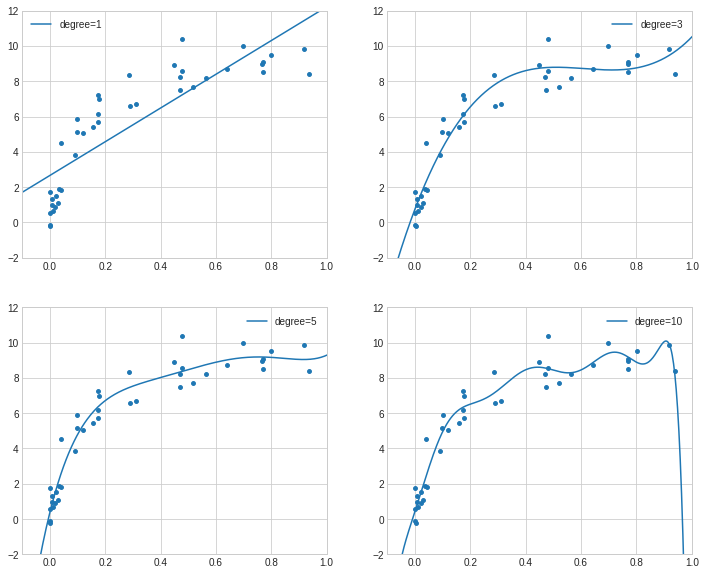

In [ ]:
# 편향-분산 분해
from sklearn.preprocessing import PolynomialFeatures #다항차수변환
from sklearn. linear_model import LinearRegression # 선형회귀
from sklearn.pipeline import make_pipeline 
import numpy as np

np.random.seed(1) # 랜덤 시드 생성
X = np.random.rand(40,1)**2 # 균일분포에서 난수 매트릭스 배열 생성
y = (10-1./(X.ravel()+0.1)) + np.random.randn(40) # X의 차원을 변환하고 랜덤값과 계산하여 y에 저장한다

import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid') #스타일 지정
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1) # linearspace
fig = plt.figure(figsize=(12, 10)) # 크기 12,10 사이즈
for i, degree in enumerate([1,3,5,10], start=1): # 반복
  ax = fig.add_subplot (2,2,i) # 서브플롯 추가
  ax.scatter(X.ravel(), y, s=15) # 점으로 그린다
  y_test = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X,y).predict(X_test) # 파이프라인 생성. 선형 회귀이용해 예측, 학습
  ax.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree)) # 플롯생성
  ax.set_xlim(-0.1, 1.0) # x축의 범위 제한
  ax.set_ylim(-2,12)  # y축의 범위 제한
  ax. legend (loc='best') #레전드의 위치조정